In [1]:
import torchvision
import torchvision.datasets as datasets
from torchvision import datasets, transforms
import numpy as np
from torch import nn, optim
import matplotlib.pyplot as plt
import torch

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
data_train = datasets.MNIST(root = "./data/",transform = transform, train = True,download = True)
data_test = datasets.MNIST(root = "./data/",transform = transform, train = False,download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 384533030.38it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 144037685.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 140853185.27it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13012656.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
img, label = data_train[0]
print(img.shape)
print(label)

torch.Size([1, 28, 28])
5


In [5]:
img = img.squeeze(0)
print(img.shape)

torch.Size([28, 28])


In [6]:
img = np.asarray(img)
print(img.shape)

(28, 28)


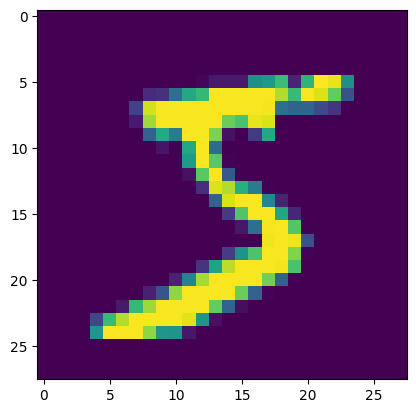

In [7]:
from PIL import Image as im
img1 = im.fromarray(img)
plt.imshow(img)

In [8]:
data_train_loader = torch.utils.data.DataLoader(dataset = data_train, batch_size = 8, shuffle = True)

data_test_loader = torch.utils.data.DataLoader(dataset = data_test,  batch_size = 1, shuffle = True)

In [9]:
print(len(data_train))
print(len(data_test))
print(len(data_train_loader))
print(len(data_test_loader))

60000
10000
7500
10000


#Model 1

In [10]:
class Net1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(784,10)

  def forward(self,x):
    x = x.view(x.size(0),-1)
    x = self.layer1(x)
    return x

In [11]:
model = Net1()
print(model)

Net1(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
)


In [12]:
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 5


In [13]:
Train_Accuracy = []
Test_Accuracy = []
Train_loss = []
Test_loss = []
for epoch in range(n_epochs):
  running_loss = 0.0
  running_correct = 0.0
  count = 0
  for data in data_train_loader :
    x_train,y_train = data
    outputs = model(x_train)
    _,pred = torch.max(outputs.data,1)
    optimizer.zero_grad()
    loss = cost(outputs,y_train)

    count += 1
    running_loss = running_loss + loss.data
    running_correct = running_correct + torch.sum(pred == y_train.data)
    # avg_loss = running_loss/count

    # train_correct = 100 * (running_correct.item()/count)
    # Train_Accuracy.append(train_correct)
    loss.backward()
    optimizer.step()
  print(f"Training : Epoch{epoch} , Avg_loss{running_loss/count}, loss{loss.item()},Accuracy:{(running_correct/len(data_train))*100}")
  avg_loss = running_loss/len(data_train)
  avg_correct = running_correct/len(data_train)
  Train_Accuracy.append(avg_correct * 100)
  Train_loss.append(avg_loss)

  running_loss = 0.0
  test_correct = 0.0
  count = 0
  # Test_Accuracy = []
  # Test_loss = []
  for data in data_test_loader :
    x_test,y_test = data
    outputs = model(x_test)
    _,pred = torch.max(outputs.data,1)
    # optimizer.zero_grad()
    loss = cost(outputs,y_test)

    count += 1
    running_loss = running_loss + loss.data
    test_correct = test_correct + torch.sum(pred == y_test.data)
    # avg_loss = running_loss/count
    #print(f"Epoch{epoch} , Avg_loss{running_loss/count}, loss{loss.item()},Accuracy:{(running_correct/count)*100}")
    # test_correct = 100 * (running_correct.item()/count)
    # Test_Accuracy.append(test_correct)
    # loss.backward()
    # optimizer.step())
  avg_loss = running_loss/len(data_test)
  avg_correct = test_correct/len(data_test)
  print(f"Testing : Epoch{epoch} , Avg_loss{running_loss/len(data_test)}, loss{loss.item()},Accuracy:{(test_correct/len(data_test))*100}")
  Test_Accuracy.append(avg_correct*100)
  Test_loss.append(avg_loss)

Training : Epoch0 , Avg_loss0.41320347785949707, loss0.143344447016716,Accuracy:87.87666320800781
Testing : Epoch0 , Avg_loss0.3321690261363983, loss0.001956217223778367,Accuracy:90.62000274658203
Training : Epoch1 , Avg_loss0.3512953519821167, loss1.0246236324310303,Accuracy:90.01499938964844
Testing : Epoch1 , Avg_loss0.3204461336135864, loss0.016271408647298813,Accuracy:91.0199966430664
Training : Epoch2 , Avg_loss0.3430839776992798, loss0.05507577210664749,Accuracy:90.4749984741211
Testing : Epoch2 , Avg_loss0.33151158690452576, loss1.3470558769768104e-05,Accuracy:90.83000183105469
Training : Epoch3 , Avg_loss0.337929368019104, loss0.007934421300888062,Accuracy:90.48500061035156
Testing : Epoch3 , Avg_loss0.44289258122444153, loss0.0038448472041636705,Accuracy:87.38999938964844
Training : Epoch4 , Avg_loss0.33156582713127136, loss0.45091772079467773,Accuracy:90.78333282470703
Testing : Epoch4 , Avg_loss0.3180595338344574, loss3.755022044060752e-05,Accuracy:91.40999603271484


In [14]:
print(count)

10000


In [15]:
Train_Accuracy

[tensor(87.8767),
 tensor(90.0150),
 tensor(90.4750),
 tensor(90.4850),
 tensor(90.7833)]

In [16]:
Test_Accuracy

[tensor(90.6200),
 tensor(91.0200),
 tensor(90.8300),
 tensor(87.3900),
 tensor(91.4100)]

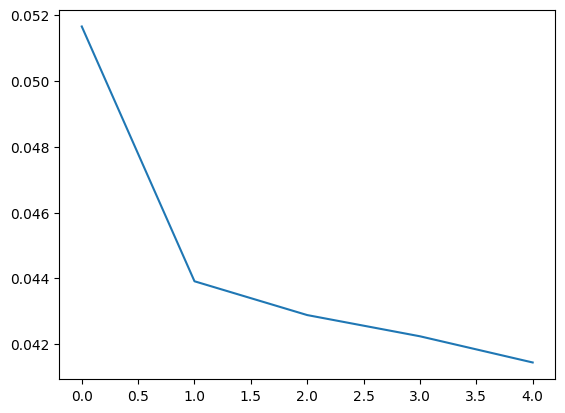

In [17]:
plt.plot(Train_loss)

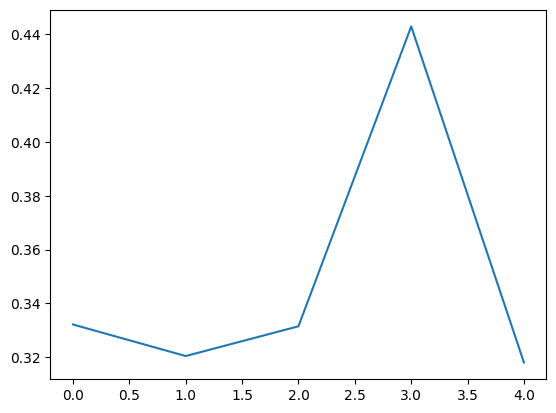

In [18]:
Test_loss
plt.plot(Test_loss)

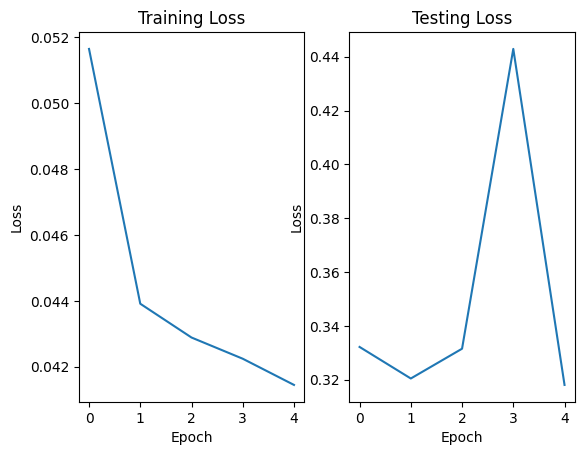

In [19]:
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.plot(Train_loss)


plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.plot(Test_loss)

#Model 2

In [20]:
class Net2(nn.Module):
  def __init__(self):
    super(Net2,self).__init__()

    self.layer1 = nn.Linear(784,10)
    self.layer2 = nn.Linear(784,10)
    self.layer3 = nn.Linear(784,10)
    self.layer4 = nn.Linear(784,10)
    self.layer5 = nn.Linear(40,10)

  def forward(self,x):
    x = x.view(x.size(0),-1)
    x1 = self.layer1(x)
    x2 = self.layer2(x)
    x3 = self.layer3(x)
    x4 = self.layer4(x)
    y = torch.cat((x1,x2,x3,x4),1)
    z = self.layer5(y)
    return z

In [21]:
model1 = Net2()
print(model1)


Net2(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (layer2): Linear(in_features=784, out_features=10, bias=True)
  (layer3): Linear(in_features=784, out_features=10, bias=True)
  (layer4): Linear(in_features=784, out_features=10, bias=True)
  (layer5): Linear(in_features=40, out_features=10, bias=True)
)


In [22]:
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())
n_epochs = 5

In [23]:
Train_Accuracy = []
Test_Accuracy = []
Train_loss = []
Test_loss = []
for epoch in range(n_epochs):
  running_loss = 0.0
  running_correct = 0.0
  count = 0
  for data in data_train_loader :
    x_train,y_train = data
    outputs = model1(x_train)
    _,pred = torch.max(outputs.data,1)
    optimizer.zero_grad()
    loss = cost(outputs,y_train)

    count += 1
    running_loss = running_loss + loss.data
    running_correct = running_correct + torch.sum(pred == y_train.data)
    # avg_loss = running_loss/count

    # train_correct = 100 * (running_correct.item()/count)
    # Train_Accuracy.append(train_correct)
    loss.backward()
    optimizer.step()
  print(f"Training : Epoch{epoch} , Avg_loss{running_loss/len(data_train)}, loss{loss.item()},Accuracy:{(running_correct/len(data_train))*100}")
  avg_loss = running_loss/len(data_train)
  avg_correct = running_correct/len(data_train)
  Train_Accuracy.append(avg_correct * 100)
  Train_loss.append(avg_loss)

  running_loss = 0.0
  test_correct = 0.0
  count = 0
  # Test_Accuracy = []
  # Test_loss = []
  for data in data_test_loader :
    x_test,y_test = data
    outputs = model1(x_test)
    _,pred = torch.max(outputs.data,1)
    # optimizer.zero_grad()
    loss = cost(outputs,y_test)

    count += 1
    running_loss = running_loss + loss.data
    test_correct = test_correct + torch.sum(pred == y_test.data)
    # avg_loss = running_loss/count
    #print(f"Epoch{epoch} , Avg_loss{running_loss/count}, loss{loss.item()},Accuracy:{(running_correct/count)*100}")
    # test_correct = 100 * (running_correct.item()/count)
    # Test_Accuracy.append(test_correct)
    # loss.backward()
    # optimizer.step())
  avg_loss = running_loss/len(data_test)
  avg_correct = test_correct/len(data_test)
  print(f"Testing : Epoch{epoch} , Avg_loss{running_loss/len(data_test)}, loss{loss.item()},Accuracy:{(test_correct/len(data_test))*100}")
  Test_Accuracy.append(avg_correct*100)
  Test_loss.append(avg_loss)

Training : Epoch0 , Avg_loss0.052218932658433914, loss0.8389418125152588,Accuracy:87.62666320800781
Testing : Epoch0 , Avg_loss0.3447544574737549, loss0.004295883700251579,Accuracy:90.29000091552734
Training : Epoch1 , Avg_loss0.044173579663038254, loss0.5214653015136719,Accuracy:89.68499755859375
Testing : Epoch1 , Avg_loss0.35139456391334534, loss0.0001679517881711945,Accuracy:89.94000244140625
Training : Epoch2 , Avg_loss0.04251839965581894, loss0.2530691623687744,Accuracy:90.11833190917969
Testing : Epoch2 , Avg_loss0.32515716552734375, loss2.253030106658116e-05,Accuracy:90.97000122070312
Training : Epoch3 , Avg_loss0.041159920394420624, loss0.003271998604759574,Accuracy:90.43499755859375
Testing : Epoch3 , Avg_loss0.3100743591785431, loss0.11113912612199783,Accuracy:91.41999816894531
Training : Epoch4 , Avg_loss0.04028452932834625, loss0.15040592849254608,Accuracy:90.7249984741211
Testing : Epoch4 , Avg_loss0.3262473940849304, loss0.4774090051651001,Accuracy:91.18000030517578


In [24]:
Test_Accuracy

[tensor(90.2900),
 tensor(89.9400),
 tensor(90.9700),
 tensor(91.4200),
 tensor(91.1800)]

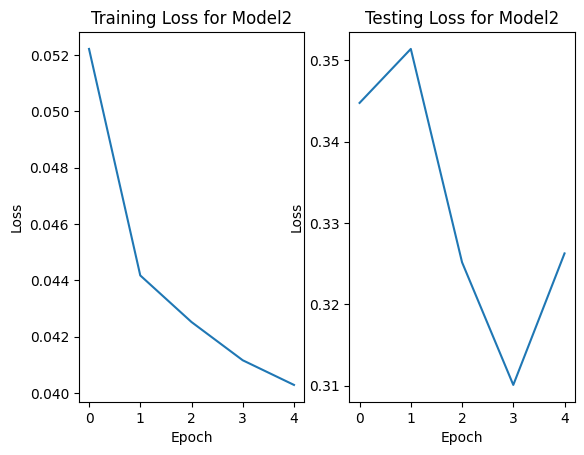

In [25]:
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Model2')
plt.plot(Train_loss)


plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss for Model2')
plt.plot(Test_loss)

#Model 3 -- CNN model

In [26]:
class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Conv2d(1,16,kernel_size=3, stride = 1, padding = 1,bias = False)
    self.act1 = nn.ReLU(inplace = True)
    self.m1 = nn.MaxPool2d(kernel_size = 3, stride=2,padding = 1)

    self.layer2 = nn.Conv2d(16,32,kernel_size=3, stride = 1, padding = 1,bias = False)
    self.act2 = nn.ReLU(inplace = True)
    self.m2  = nn.MaxPool2d(kernel_size = 3, stride=2, padding = 1)

    self.layer3 = nn.Conv2d(32,64,kernel_size=3, stride = 2, padding = 1,bias = False)
    self.act3 = nn.ReLU(inplace = True)
    self.layer4 = nn.Linear(1024,512)
    self.layer5 = nn.Linear(512,10)

  def forward(self,x):

    x = self.layer1(x)
    x = self.act1(x)
    x = self.m1(x)
    x = self.layer2(x)
    x = self.act2(x)
    x = self.m2(x)
    x = self.layer3(x)
    x = self.act3(x)
    # x = self.m3(x)
    x = x.view(x.size(0),-1)
    x = self.layer4(x)
    x = self.layer5(x)
    return x


In [27]:
model2 = Model()
print(model2)

Model(
  (layer1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (act1): ReLU(inplace=True)
  (m1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (act2): ReLU(inplace=True)
  (m2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (act3): ReLU(inplace=True)
  (layer4): Linear(in_features=1024, out_features=512, bias=True)
  (layer5): Linear(in_features=512, out_features=10, bias=True)
)


In [28]:
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters())
n_epochs = 5

In [29]:
Train_Accuracy = []
Test_Accuracy = []
Train_loss = []
Test_loss = []
for epoch in range(n_epochs):
  running_loss = 0.0
  running_correct = 0.0
  count = 0
  for data in data_train_loader :
    x_train,y_train = data
    outputs = model2(x_train)
    _,pred = torch.max(outputs.data,1)
    optimizer.zero_grad()
    loss = cost(outputs,y_train)

    count += 1
    running_loss = running_loss + loss.data
    running_correct = running_correct + torch.sum(pred == y_train.data)
    # avg_loss = running_loss/count

    # train_correct = 100 * (running_correct.item()/count)
    # Train_Accuracy.append(train_correct)
    loss.backward()
    optimizer.step()
  print(f"Training : Epoch{epoch} , Avg_loss{running_loss/len(data_train)}, loss{loss.item()},Accuracy:{(running_correct/len(data_train))*100}")
  avg_loss = running_loss/len(data_train)
  avg_correct = running_correct/len(data_train)
  Train_Accuracy.append(avg_correct * 100)
  Train_loss.append(avg_loss)

  running_loss = 0.0
  test_correct = 0.0
  count = 0
  # Test_Accuracy = []
  # Test_loss = []
  for data in data_test_loader :
    x_test,y_test = data
    outputs = model2(x_test)
    _,pred = torch.max(outputs.data,1)
    # optimizer.zero_grad()
    loss = cost(outputs,y_test)

    count += 1
    running_loss = running_loss + loss.data
    test_correct = test_correct + torch.sum(pred == y_test.data)
    # avg_loss = running_loss/count
    #print(f"Epoch{epoch} , Avg_loss{running_loss/count}, loss{loss.item()},Accuracy:{(running_correct/count)*100}")
    # test_correct = 100 * (running_correct.item()/count)
    # Test_Accuracy.append(test_correct)
    # loss.backward()
    # optimizer.step())
  avg_loss = running_loss/len(data_test)
  avg_correct = test_correct/len(data_test)
  print(f"Testing : Epoch{epoch} , Avg_loss{running_loss/len(data_test)}, loss{loss.item()},Accuracy:{(test_correct/len(data_test))*100}")
  Test_Accuracy.append(avg_correct*100)
  Test_loss.append(avg_loss)

Training : Epoch0 , Avg_loss0.01596781238913536, loss0.7190964818000793,Accuracy:95.97000122070312
Testing : Epoch0 , Avg_loss0.05467376857995987, loss1.5139465176616795e-05,Accuracy:98.22000122070312
Training : Epoch1 , Avg_loss0.008576401509344578, loss0.0004519453505054116,Accuracy:98.0199966430664
Testing : Epoch1 , Avg_loss0.04545815289020538, loss0.0,Accuracy:98.65999603271484
Training : Epoch2 , Avg_loss0.007437215186655521, loss1.2621015230251942e-05,Accuracy:98.23333740234375
Testing : Epoch2 , Avg_loss0.046834252774715424, loss1.1920928244535389e-07,Accuracy:98.68999481201172
Training : Epoch3 , Avg_loss0.006603951100260019, loss5.2783907449338585e-05,Accuracy:98.4183349609375
Testing : Epoch3 , Avg_loss0.051446545869112015, loss1.0609570381348021e-05,Accuracy:98.52999877929688
Training : Epoch4 , Avg_loss0.006338047794997692, loss0.0005512546049430966,Accuracy:98.48999786376953
Testing : Epoch4 , Avg_loss0.038690321147441864, loss0.14838790893554688,Accuracy:98.6599960327148

In [30]:
print(Train_Accuracy)

[tensor(95.9700), tensor(98.0200), tensor(98.2333), tensor(98.4183), tensor(98.4900)]


In [31]:
print(Test_Accuracy)

[tensor(98.2200), tensor(98.6600), tensor(98.6900), tensor(98.5300), tensor(98.6600)]


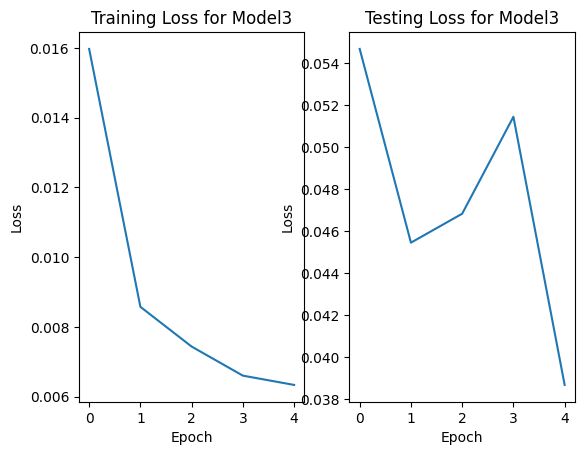

In [32]:
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Model3')
plt.plot(Train_loss)


plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss for Model3')
plt.plot(Test_loss)